<a href="https://colab.research.google.com/github/CassioRibeiro/PROJETO2M4/blob/main/Projeto2M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formação Análise de Dados Senac/Resilia

* Módulo 4
* Projeto individual 2

In [37]:
import pandas as pd

image.png

In [38]:
milsa = pd.read_csv('http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv', index_col = 'Funcionario') 
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


image.png

In [39]:
milsa.drop('Meses', axis=1, inplace=True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,NaN,5.73,20,outro
5,solteiro,1o Grau,NaN,6.26,40,outro


#Preenchendo os campos vazios na coluna 'Filhos' onde NaN é considerado e substituido por zero (0)

* conteúdo extra

In [40]:
milsa["Filhos"].fillna(0, inplace=True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,0.0,5.73,20,outro
5,solteiro,1o Grau,0.0,6.26,40,outro


# Alterando o tipo da coluna 'Filhos' para int pois não faz sentido float para quantidade de filhos vez que não existe meio filho.

* Conteúdo extra

In [41]:
milsa['Filhos'] = milsa['Filhos'].astype(int)

# Dividindo classes de funcionários conforme seu salário e gerando um gráfico para elucidar melhor essa proporção.

In [98]:
classe_salarial = pd.cut(x = milsa.Salario, bins = [0,8, 12,17,23], labels = ['Estagiário','Junior','Pleno','Sênior'], include_lowest = True)
quantidade = classe_salarial.value_counts()
quantidade

Junior        13
Estagiário    10
Pleno          9
Sênior         3
Name: Salario, dtype: int64

<Axes: title={'center': 'Quantidade de funcionários por classe'}>

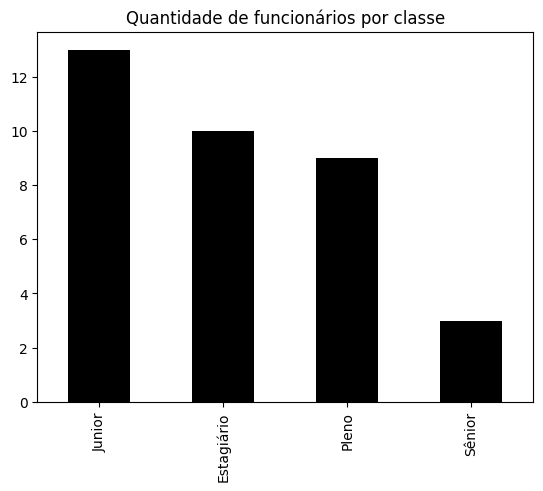

In [99]:
quantidade.plot.bar(title = 'Quantidade de funcionários por classe', color = 'black')

array([<Axes: ylabel='Salario'>], dtype=object)

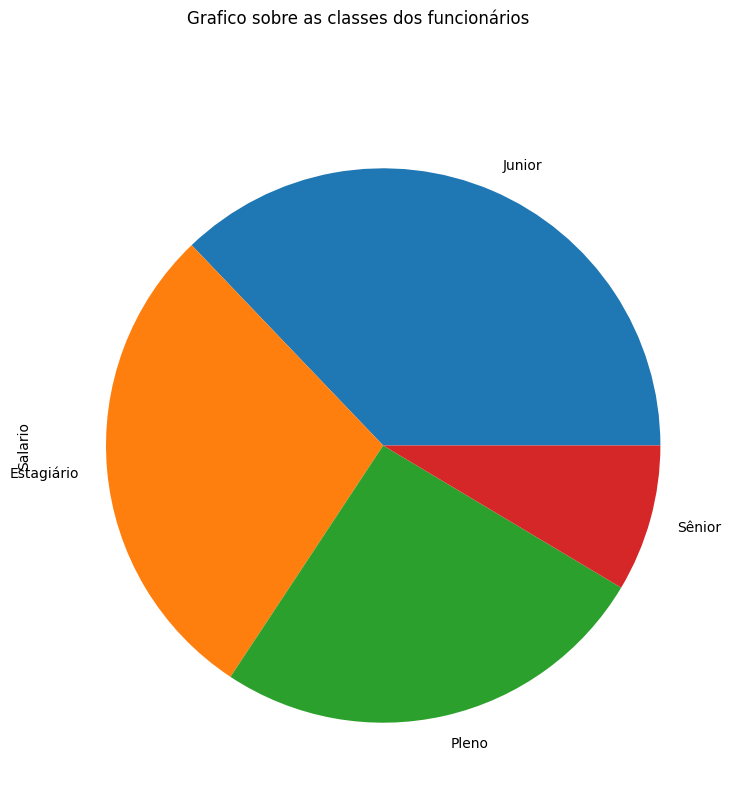

In [100]:
quantidade.plot.pie(title = 'Grafico sobre as classes dos funcionários',subplots=True,figsize = (20,9))

image.png

In [45]:
idade_media = milsa['Anos'].mean()
print('A idade média dos funcionários é de {:.0f} anos'.format(idade_media))

A idade média dos funcionários é de 35 anos


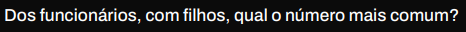

In [46]:
display(milsa['Filhos'].mode().to_frame())
print('\nOu seja, o mais comum, dentre os funcionários da Milsa, é que eles não tenham filhos')

,Filhos
0,0



Ou seja, o mais comum, dentre os funcionários da Milsa, é que eles não tenham filhos


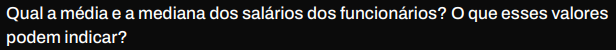

In [47]:
milsa['Salario'].mean().round(2)

11.12

In [48]:
milsa['Salario'].median()

10.165

image.png


* tabela com as três instruções existentes e sua média salarial  (conteúdo extra)

In [49]:
instrucoes = milsa[['Inst', 'Salario']].groupby('Inst').mean().sort_values(by = 'Salario', ascending = False).round(2)
instrucoes.index.name= 'Instrução'
instrucoes

,Salario
Instrução,
Superior,16.47
2o Grau,11.53
1o Grau,7.84


image.png


* Também adicionada o mesmo conteúdo para os solteiros (conteúdo extra)

In [50]:
estado_civil = milsa[['Est.civil', 'Salario','Anos' ]].groupby('Est.civil').mean().sort_values(by = 'Salario', ascending = False).round(2)
estado_civil.index.name = 'Est.civill'
estado_civil['Anos'] = estado_civil['Anos'].astype(int)
estado_civil

,Salario,Anos
Est.civill,,
casado,12.12,35
solteiro,9.87,33


# Separando os casados dos solteiros para análise futura

In [51]:
casados = milsa.loc[milsa['Est.civil'] == 'casado' ]
casados.head(3)

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
2,casado,1o Grau,1,4.56,32,capital
3,casado,1o Grau,2,5.25,36,capital
6,casado,1o Grau,0,6.66,28,interior


In [52]:
solteiros = milsa.loc[milsa['Est.civil'] == 'solteiro']
solteiros.head(3)

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,0,4.00,26,interior
4,solteiro,2o Grau,0,5.73,20,outro
5,solteiro,1o Grau,0,6.26,40,outro


image.png

In [53]:
salario = milsa.sort_values(by = 'Salario', ascending= False)
salario.iloc[0].to_frame()

,36
Est.civil,casado
Inst,Superior
Filhos,3
Salario,23.3
Anos,42
Regiao,interior


image.png

In [54]:
idade = milsa.sort_values(by = 'Anos')
idade.iloc[0].to_frame()

,4
Est.civil,solteiro
Inst,2o Grau
Filhos,0
Salario,5.73
Anos,20
Regiao,outro


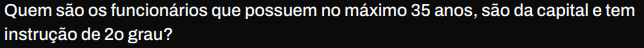

In [55]:
milsa.loc[(milsa['Anos'] <= 35 ) & (milsa['Regiao'] == 'capital') & (milsa['Inst'] == '2o Grau')]

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
9,casado,2o Grau,1,7.59,34,capital
17,casado,2o Grau,1,9.77,31,capital
22,solteiro,2o Grau,0,11.59,34,capital
30,casado,2o Grau,2,15.99,35,capital


In [56]:
copia_milsa = milsa.copy()

In [57]:
copia_milsa['Est.civil'] = copia_milsa['Est.civil'].map({'solteiro':1,
                             'casado': 2,},
                             na_action=None)

In [58]:
copia_milsa['Inst'] = copia_milsa['Inst'].map({'1o Grau':1,
                             '2o Grau': 2,
                             'Superior': 3},
                             na_action=None)

In [59]:
copia_milsa['Regiao'] = copia_milsa['Regiao'].map({'capital':1,
                             'interior': 2,
                             'outro': 3},
                             na_action=None)

In [60]:
copia_milsa.head(10)

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,1,1,0,4.00,26,2
2,2,1,1,4.56,32,1
3,2,1,2,5.25,36,1
4,1,2,0,5.73,20,3
5,1,1,0,6.26,40,3
6,2,1,0,6.66,28,2
7,1,1,0,6.86,41,2
8,1,1,0,7.39,43,1
9,2,2,1,7.59,34,1


image.png

In [105]:
display(copia_milsa.corr())
print('\nAnalisando a correlação podemos fazer algumas observações sobre os funcionários da companhia Milsa.\nComeçamos pelo Estado civil onde sua relaçao com a instrução é muito baixo e não diz muita coisa, já com relação a filhos, podemos ver uma variação maior\nonde os casados tendem a ter mais filhos.\n')
print('\nNa instrução vemos uma correlação de média a forte com o salario, ou seja, o Salario tende a crescer conforme seu grau de instrução também cresce.')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Est.civil,1.000000,0.108465,0.664838,0.247488,0.095369,-0.213498
Inst,0.108465,1.000000,0.114723,0.639350,-0.216011,-0.033082
Filhos,0.664838,0.114723,1.000000,0.375551,0.422981,-0.161297
Salario,0.247488,0.639350,0.375551,1.000000,0.363362,-0.093966
Anos,0.095369,-0.216011,0.422981,0.363362,1.000000,-0.077851
Regiao,-0.213498,-0.033082,-0.161297,-0.093966,-0.077851,1.000000



Analisando a correlação podemos fazer algumas observações sobre os funcionários da companhia Milsa.
Começamos pelo Estado civil onde sua relaçao com a instrução é muito baixo e não diz muita coisa, já com relação a filhos, podemos ver uma variação maior
onde os casados tendem a ter mais filhos.


Na instrução vemos uma correlação de média a forte com o salario, ou seja, o Salario tende a crescer conforme seu grau de instrução também cresce.


<Axes: >

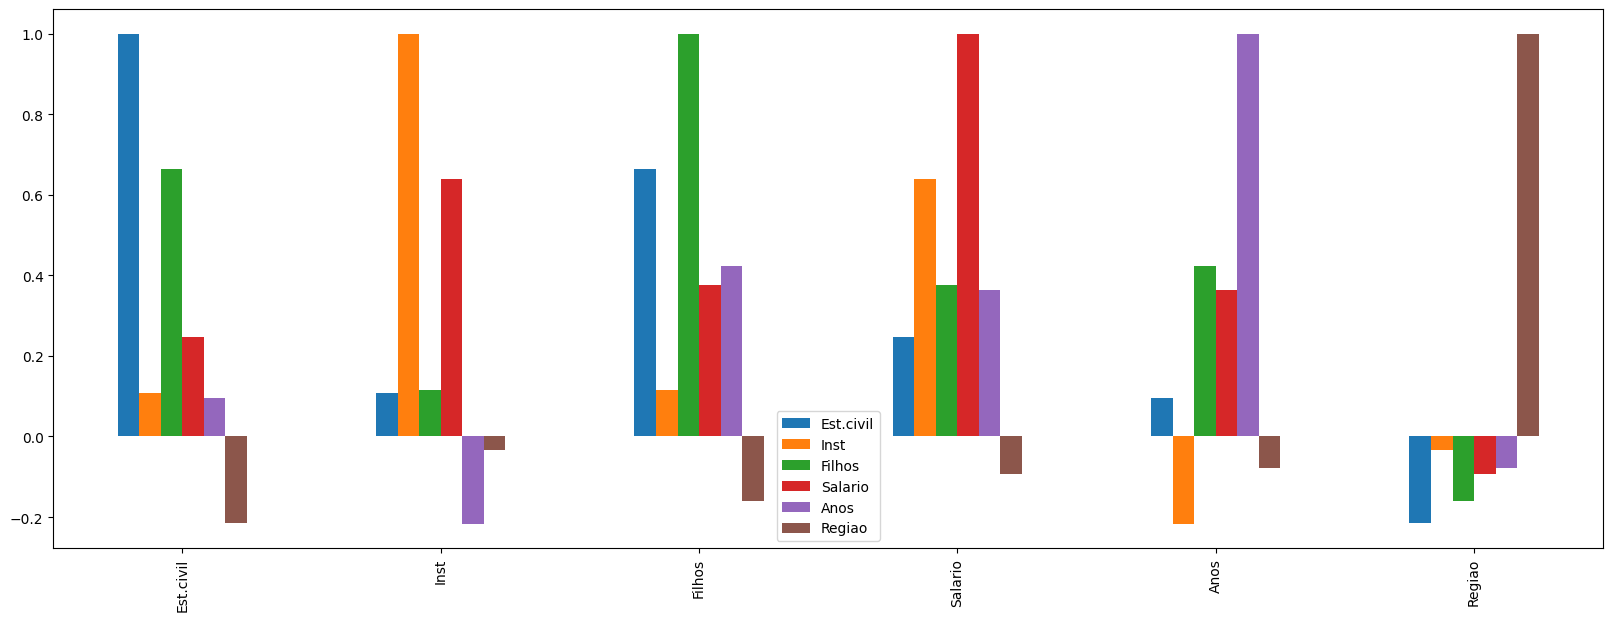

In [62]:
copia_milsa.corr().plot.bar(figsize=(20,7))